# Análisis de Devoluciones en el Retail

## Importando lo necesario

In [285]:
"""Importando los paquetes necesarios"""
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 200
import seaborn as sns
import os

## Lectura de datos

### Reuniendo la información y cargandola en un dataframe de pandas
#### Los datos utilizados fueron extraidos de Kaggle https://www.kaggle.com/datasets/tylermorse/retail-business-sales-20172019


In [286]:
for dirname, _, filenames in os.walk('/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/Base Devolucoes.xlsx
/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/Base Vendas.xlsx
/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/business.retailsales.csv
/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/business.retailsales.gsheet
/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/business.retailsales2.gsheet
/Volumes/GoogleDrive

In [287]:
"""Leyendo los datos"""
df = pd.read_csv('/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/business.retailsales.csv')
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [288]:
df.tail()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00
1774,Kitchen,-1,0.0,0.00,-106.25,-106.25


### Inspección visual de los datos

In [289]:
"""Para business.retailsales.cvs"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
Product Type       1767 non-null object
Net Quantity       1775 non-null int64
Gross Sales        1775 non-null float64
Discounts          1775 non-null float64
Returns            1775 non-null float64
Total Net Sales    1775 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [290]:
"""Hay 8 filas con datos nulos en Product Type las cuales removeré para que no perturben el análisis"""
"""Leyendo la segunda base de datos"""
df2 = pd.read_csv('/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/business.retailsales2.csv')
df2.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [291]:
df2.tail()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
31,August,2019,105,8839.50,-201.67,-84.37,8553.46,1724.75,10278.21
32,September,2019,88,9077.45,-354.89,-853.35,7869.21,1567.65,9436.86
33,October,2019,97,9132.25,-279.42,-1572.55,7280.28,1631.25,8911.53
34,November,2019,272,23997.90,-776.84,-364.51,22856.55,4824.75,27681.30
35,December,2019,342,31183.90,-2269.51,-1311.18,27603.21,5703.25,33306.46


In [292]:
"""Inspeccion visual de los datos para bussiness.retail2.csv"""
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
Month           36 non-null object
Year            36 non-null int64
Total Orders    36 non-null int64
Gross Sales     36 non-null float64
Discounts       36 non-null float64
Returns         36 non-null float64
Net Sales       36 non-null float64
Shipping        36 non-null float64
Total Sales     36 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ KB


In [293]:
"""Todas las filas tienen datos?"""
"""¿Cuántos datos nulos hay?"""
df.isnull().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [294]:
""" se confirma que business.retailsales.csv tiene 8 filas con datos nulos"""
df2.isnull().sum()

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [295]:
"""Nº de duplicados"""
sum(df.duplicated()),sum(df2.duplicated())

(512, 0)

In [296]:
"""Parece haber 512 lineas duplicadas en dataset 'business.retailsales.csv'y ninguna en 'business.retailsales2.csv'"""
"""Es improbable que la estructura de una venta sea idéntica a otra (improbable tener dos líneas de datos idénticas). Por ejemplo, las devoluciones no debieran coincidir si son ventas diferentes. Por lo tanto se procederá a eliminar los duplicados"""
"""Descripción de los datos"""
df.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [297]:
df2.describe()

,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,97.138889,9844.926389,-311.493889,-474.958056,9058.474444,1579.391667,10637.941111
std,0.828079,57.458632,4936.386351,362.766989,488.820410,4497.185264,1011.170014,5475.621125
min,2017.000000,54.000000,5720.000000,-2269.510000,-1572.550000,4589.100000,695.420000,5296.530000
25%,2017.000000,68.000000,7059.875000,-300.375000,-867.200000,6428.250000,1083.300000,7633.692500
50%,2018.000000,82.500000,8850.500000,-236.160000,-299.875000,8076.430000,1341.650000,9404.405000
75%,2019.000000,97.500000,10150.700000,-169.487500,-73.277500,9534.000000,1632.132500,11153.687500
max,2019.000000,342.000000,31183.900000,-51.500000,0.000000,27603.210000,5703.250000,33306.460000


In [298]:
display(df2.Year)

0     2017
1     2017
2     2017
3     2017
4     2017
5     2017
6     2017
7     2017
8     2017
9     2017
10    2017
11    2017
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
20    2018
21    2018
22    2018
23    2018
24    2019
25    2019
26    2019
27    2019
28    2019
29    2019
30    2019
31    2019
32    2019
33    2019
34    2019
35    2019
Name: Year, dtype: int64

# Problemas en los datos

1. Hay 8 filas de business.retailsales.cvs con NaN en Product Type
2. business.retailsales.cvs tiene 512 filas duplicadas

# Limpieza de los datos

In [299]:
"""Hago una copia para no intervenir la base de datos original"""
df_clean = df.copy()
df2_clean = df2.copy()

### Problema 1.
### Define

8 filas con valores NaN

### Code

In [300]:
"""Procedemos a eliminar las filas con NaN en Product Type"""
df_clean.dropna(inplace = True)

### Testing

In [301]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1774
Data columns (total 6 columns):
Product Type       1767 non-null object
Net Quantity       1767 non-null int64
Gross Sales        1767 non-null float64
Discounts          1767 non-null float64
Returns            1767 non-null float64
Total Net Sales    1767 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 96.6+ KB


### Problema 2.
### Define

512 filas duplicadas

In [302]:
"""Procedo a eliminar duplicados"""
df_clean.drop_duplicates(inplace=True)

### Testing

In [303]:
print(sum(df_clean.duplicated()))

0


### Escribiendo la base de datos limpia a un nuevo archivo CSV

In [304]:
df_clean.to_csv('/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/Datos Limpios/businessretail.csv')
df2_clean.to_csv('/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/Datos Limpios/businessretail2.csv')

In [305]:
"""Listando los archivos con datos limpios disponibles"""
for dirname, _, filenames in os.walk('/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/Datos Limpios'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/Datos Limpios/businessretail.csv
/Volumes/GoogleDrive-102762361696113273563/My Drive/Postulacion CORFO Capital Semilla 2021/Como abordar las devoluciones y actuar a traves de la cadena de suministro/Datos/Datos Limpios/businessretail2.csv


# Análisis y Visualizaciones

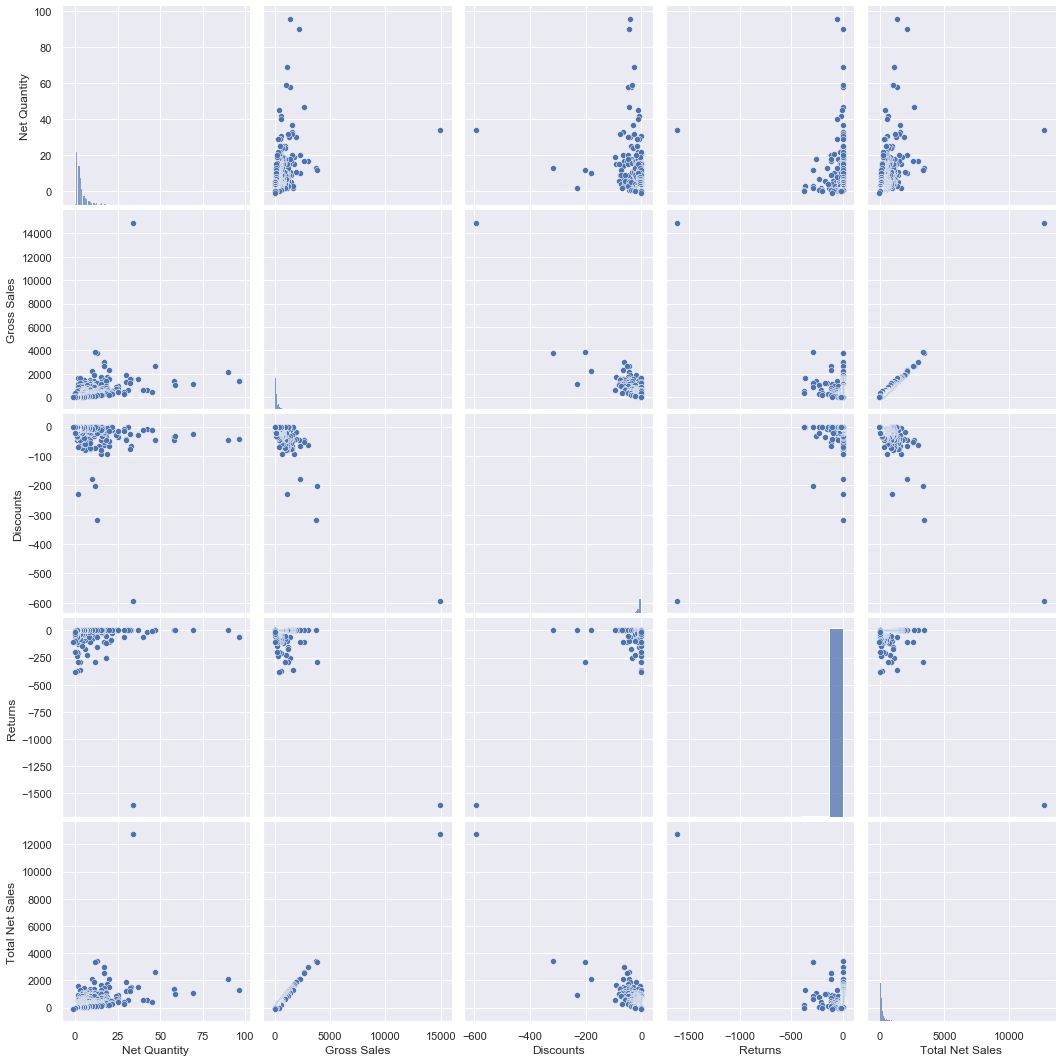

In [306]:
sns.pairplot(df_clean, height = 3);

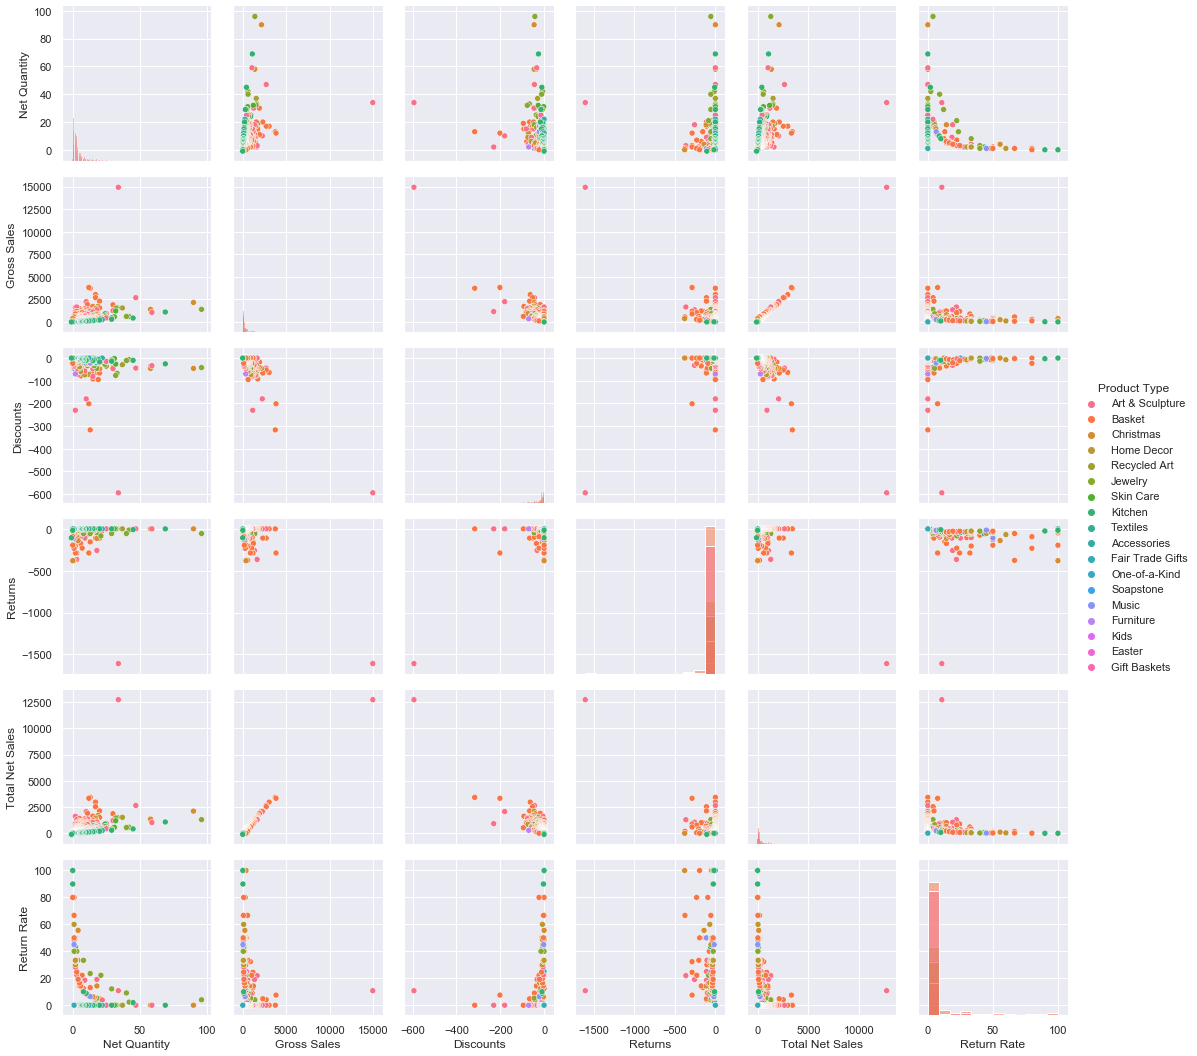

In [376]:
g=sns.PairGrid(data=df_clean, hue = 'Product Type')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

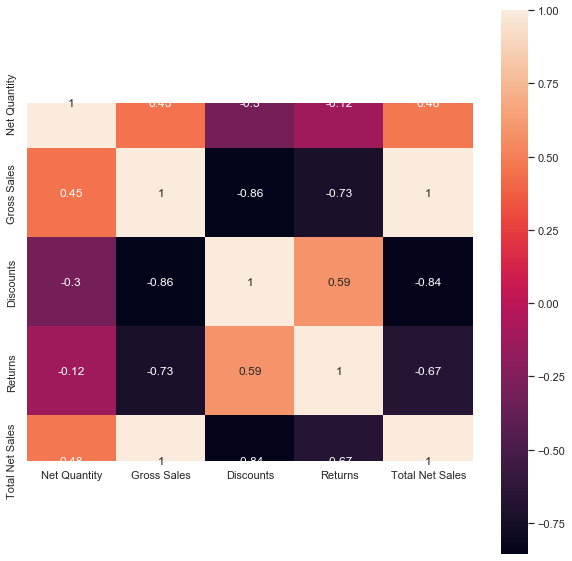

In [307]:
sns.set_context("paper")
sns.set_theme(style="white")
correlaciones = df_clean.corr()
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlaciones, annot=True, square = True);

Además de correlaciones obvias como la que se puede esperar en Total Net Sales y Discounts, no hay correlaciones significativas.Cabe mencionar una leve correlación (-0.73) entre Gross Sales y Returns. Esto es esperable derivado del hecho que mayores ventas brutas de un producto específico conllevan asociadas un  mayor potencial de devoluciones. Por otra parte, es posible descartar completamente una potencial correlación de Returns y Discounts.

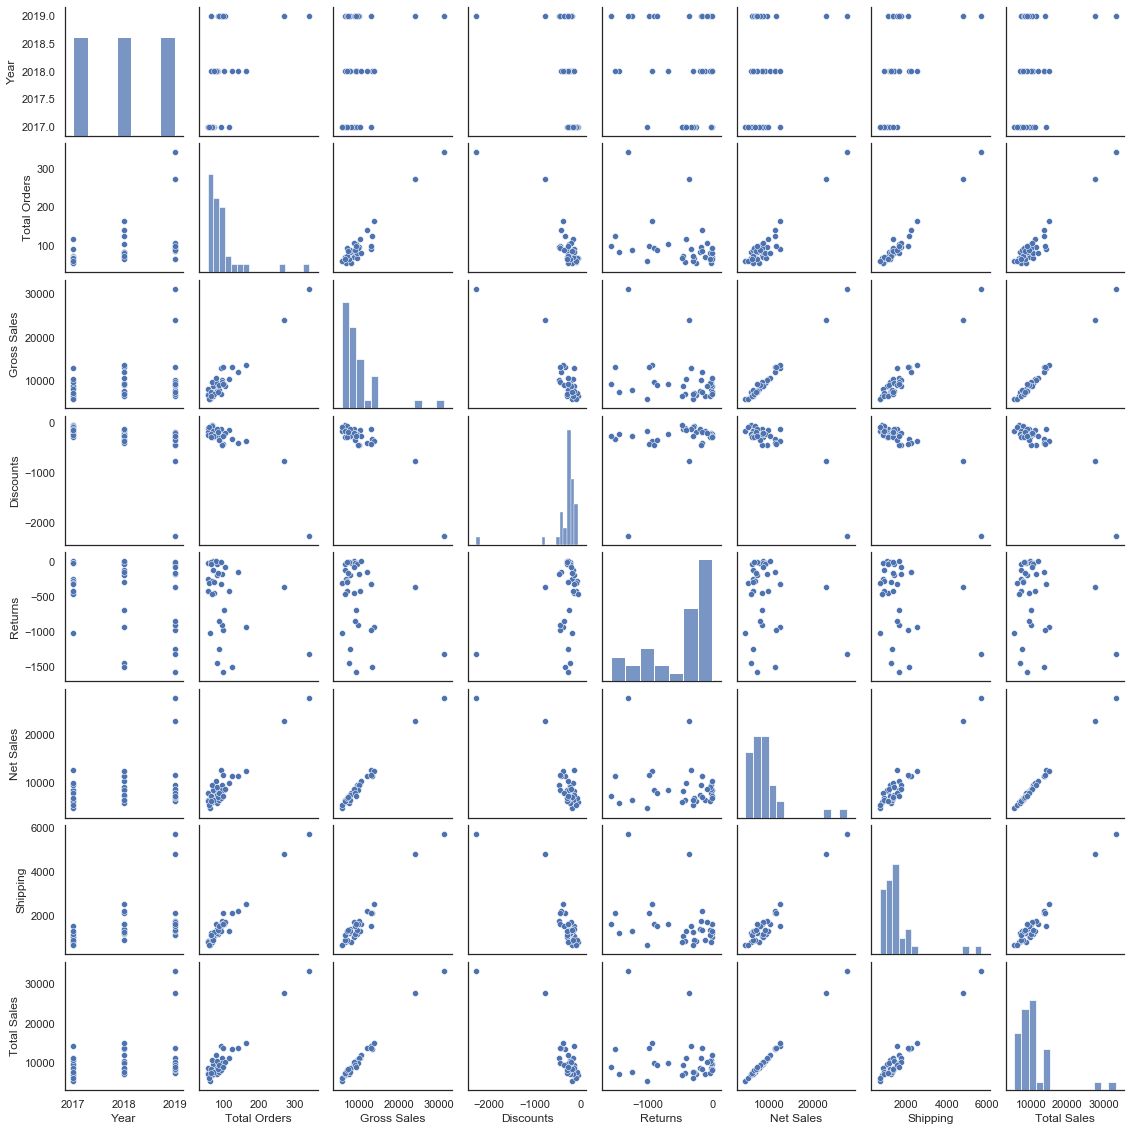

In [37]:
sns.pairplot(df2_clean, height=2)

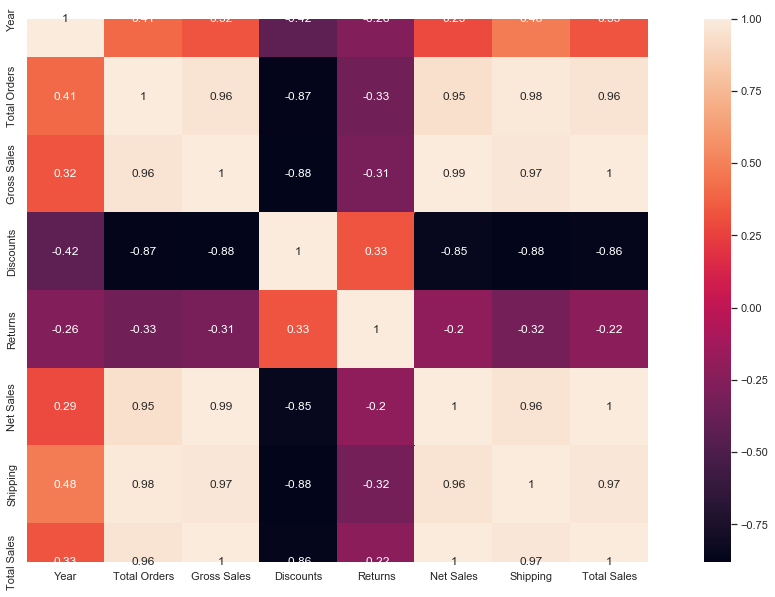

In [325]:
sns.set_context("paper")
sns.set_theme(style="white")
correlaciones_2 = df2_clean.corr()
#cmap = sns.diverging_palette(350, 20, as_cmap=True)
f,ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlaciones_2, annot = True, square = True);
# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


No se observan correlaciones entre los datos de 'business.retailsales2.cvs'

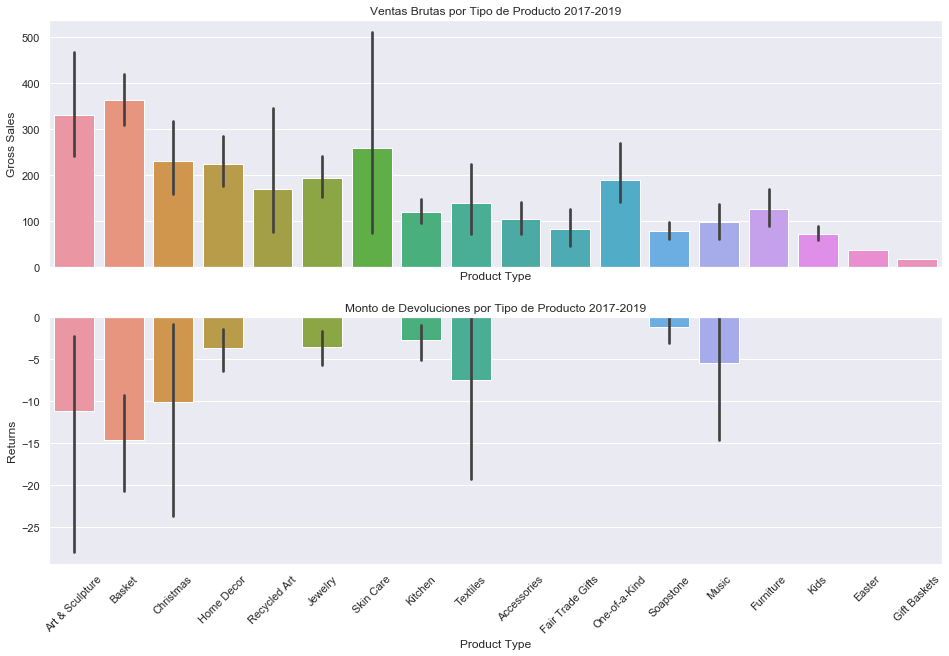

In [342]:
fig, ax = plt.subplots(2,1, figsize = (16,10), sharex = 'all')

sns.barplot(x = 'Product Type', y = 'Gross Sales', data = df_clean, ax = ax[0])
ax[0].set_title('Ventas Brutas por Tipo de Producto 2017-2019')

sns.barplot(x = 'Product Type', y= 'Returns', data = df_clean, ax = ax[1])
ax[1].set_title('Monto de Devoluciones por Tipo de Producto 2017-2019')

plt.xticks(rotation = 45);

Basket, Skin Care y Art Sculpture son las categorías con las mayores ventas brutas en el período 2017-2019.

Las categorías en las cuales se devuelven un monto mayor en términos monetarios son Basket, Art&Sculpture y Christmas.

In [340]:
df2_clean.sample(5)
#df2_clean['Return Rate']=df2_clean.Returns/df2_clean['Gross Sales']
df_clean.sample(5)
df_clean['Return Rate']=-df_clean.Returns/df_clean['Gross Sales']*100
df_clean.sample(10)

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Gross Sales Level,Net Sales Level,Return Rate
1695,Christmas,1,18.0,0.00,0.0,18.00,Low,Low,-0.000000
73,Basket,7,1035.0,-23.00,-230.0,782.00,High,High,22.222222
1158,Home Decor,1,120.0,-6.00,-54.0,60.00,High,Low,45.000000
516,Kids,5,170.0,-3.40,0.0,166.60,High,Low,-0.000000
1577,Soapstone,1,28.0,0.00,0.0,28.00,Low,Low,-0.000000
1120,Jewelry,1,72.0,-7.20,0.0,64.80,Low,Low,-0.000000
1090,Kids,2,68.0,0.00,0.0,68.00,Low,Low,-0.000000
1333,Basket,1,44.0,0.00,0.0,44.00,Low,Low,-0.000000
1355,Kids,3,45.0,-1.36,0.0,43.64,Low,Low,-0.000000
1734,Music,1,18.0,-1.80,0.0,16.20,Low,Low,-0.000000


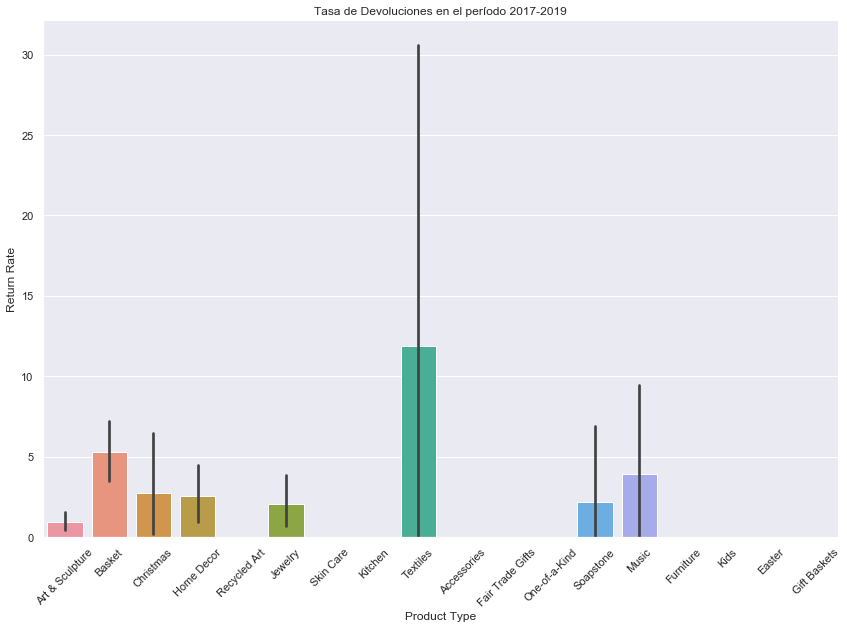

In [341]:
sns.set_theme(style='darkgrid')
sns.set_context('notebook')
sns.catplot(data= df_clean, x='Product Type', y='Return Rate',kind='bar', height =8, aspect = 1.5)
plt.xticks(rotation=45)
plt.title('Tasa de Devoluciones en el período 2017-2019');

La categoría que exhibe la mayor tasa de devolución son Textiles seguida por Basket y Music, aunque la desviación estándar es demasiado elevada para asegurar un nivel de confianza significativo a este hallazgo. 

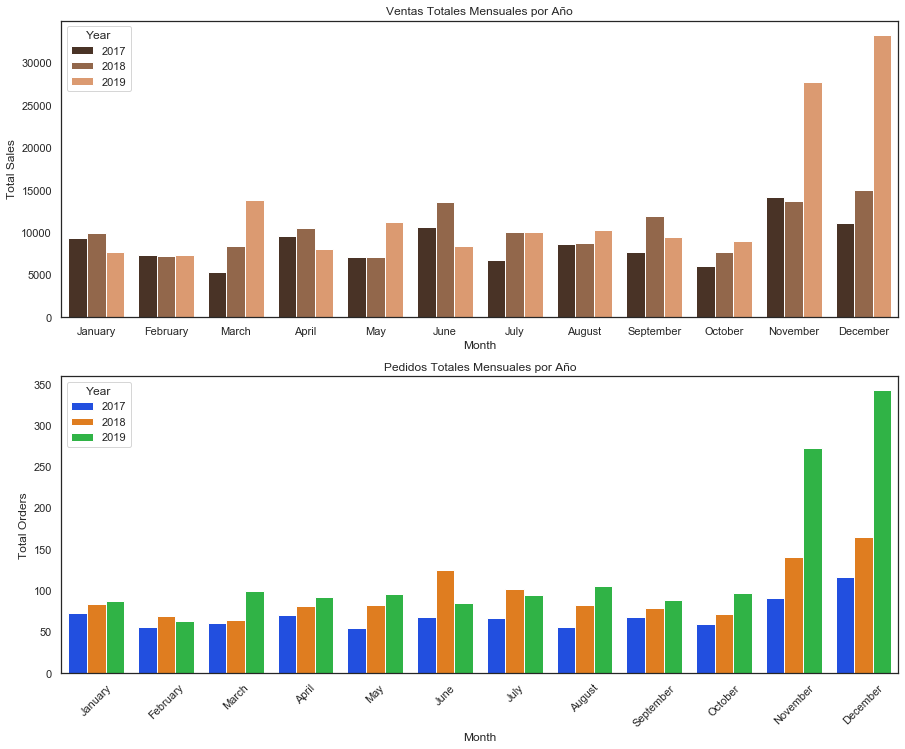

In [336]:
"""Un manera más llamativa de visualizar los mismo y en conjunto con otros datos"""
fig, ax = plt.subplots(2,1, figsize = (15,12))

sns.barplot(x = 'Month', y = 'Total Sales', data = df2_clean, hue = 'Year', ax = ax[0], palette = 'copper')
ax[0].set_title('Ventas Totales Mensuales por Año')
plt.xticks(rotation = 45);

sns.barplot(x = 'Month', y = 'Total Orders', data = df2_clean, hue = 'Year', ax= ax[1],palette = 'bright')
ax[1].set_title('Pedidos Totales Mensuales por Año')
plt.xticks(rotation = 45);

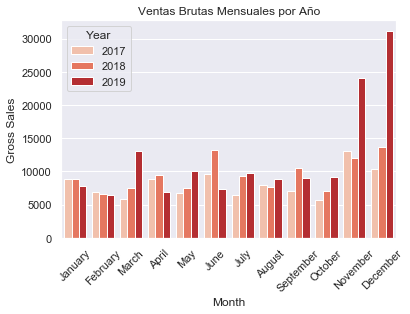

In [432]:
sns.barplot(x='Month', y='Gross Sales', data = df2_clean, hue = 'Year', palette = 'Reds')
plt.title('Ventas Brutas Mensuales por Año')
plt.xticks(rotation = 45);

Los datos anuales y mensuales para las ventas y pedidos totales muestra como aumentaron ostensiblemente en 2019 respecto de los dos años anteriores

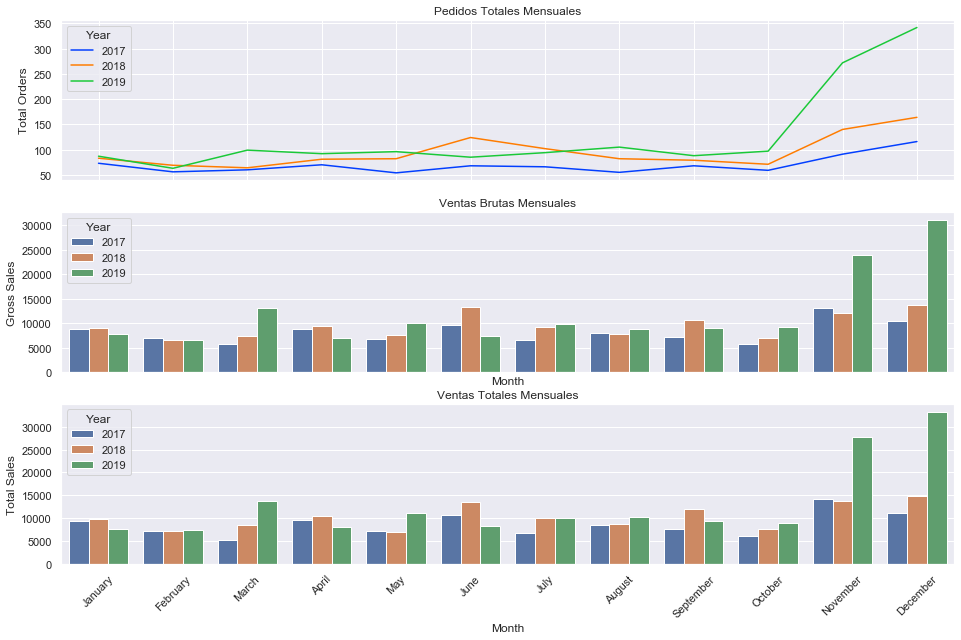

In [435]:
fig, ax = plt.subplots(3,1, figsize = (16,10), sharex = 'all')

sns.lineplot(x = "Month", y = "Total Orders", data = df2_clean, hue = "Year", ax = ax[0], palette = "bright", sort = True)
ax[0].set_title("Pedidos Totales Mensuales")

sns.barplot(x = "Month", y = "Gross Sales", data = df2_clean, hue = "Year", ax = ax[1])
ax[1].set_title("Ventas Brutas Mensuales")

sns.barplot(x = "Month", y = "Total Sales", data = df2_clean, hue = "Year", ax = ax[2])
ax[2].set_title("Ventas Totales Mensuales")
plt.xticks(rotation=45);

Los pedidos y ventas totales mensuales junto a las ventas brutas mensuales se mantienen parejas durante el año pero muestran un claro aumento en la época de fin de año durante Noviembre y Diciembre. Además se registró un aumento sustancial en el mes de Diciembre de 2019 respecto del mismo mes en los dos años anteriores.

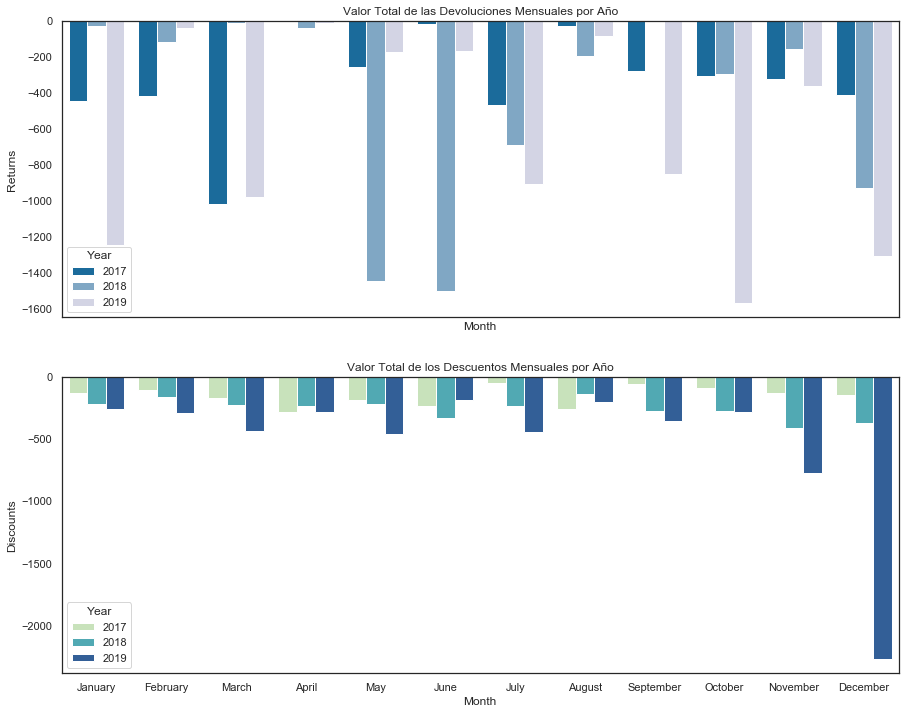

In [337]:
fig, ax = plt.subplots(2,1, figsize = (15,12), sharex = 'all')

sns.barplot(x = 'Month', y = 'Returns', data = df2_clean, hue ='Year', ax = ax[0], palette = 'PuBu_r')
ax[0].set_title('Valor Total de las Devoluciones Mensuales por Año');

sns.barplot(x = 'Month', y ='Discounts', data = df2_clean, hue ='Year', ax = ax[1], palette = 'YlGnBu')
ax[1].set_title('Valor Total de los Descuentos Mensuales por Año');

Mayo y Junio de 2018 registran el mayor volumen de devoluciones mensual en términos económicos, seguidos popr Enero Julio y Octubre de 2019.

Noviembre y Diciembre acaparan los mayores descuentos en términos económicos y "saltan" en el año 2019 respecto de los dos años anteriores.

In [436]:
display(df_clean.describe(percentiles=[.01,.5,.75]))

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Return Rate
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.0
mean,4.700637,243.545263,-8.130876,-7.610788,227.803599,inf
std,7.181064,544.436285,24.395823,55.315487,484.887912,NaN
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000,-0.0
1%,0.550000,16.000000,-72.000000,-184.000000,6.600000,-0.0
50%,3.000000,116.000000,-2.800000,0.000000,110.200000,-0.0
75%,5.000000,240.000000,0.000000,0.000000,225.332500,-0.0
max,96.000000,14935.000000,0.000000,0.000000,12732.000000,inf


In [437]:
def label(value,low_max, high_min):
    if value < 0:
        if value*-1 > high_min:
            return 'High'
        elif value*-1> low_max:
            return 'Medium'
        else: 
            return 'Low'
    elif value>high_min:
        return 'High'
    elif value>low_max:
        return 'Medium'
    else:
        return 'Low'
        
df_clean['Return Level']= df_clean['Returns'].apply(label, low_max=116, high_min=500)
display(df_clean)

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Gross Sales Level,Net Sales Level,Return Rate,Return Level
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00,High,High,10.773351,High
1,Basket,13,3744.0,-316.80,0.00,3427.20,High,High,-0.000000,Low
2,Basket,12,3825.0,-201.60,-288.00,3335.40,High,High,7.529412,Medium
3,Basket,17,3035.0,-63.25,0.00,2971.75,High,High,-0.000000,Low
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64,High,High,-0.000000,Low
...,...,...,...,...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00,Low,Low,89.964286,Low
1771,Jewelry,0,28.0,0.00,-28.00,0.00,Low,Low,100.000000,Low
1772,Basket,0,116.0,-23.20,-92.80,0.00,Low,Low,80.000000,Low
1773,Kitchen,0,16.5,0.00,-16.50,0.00,Low,Low,100.000000,Low


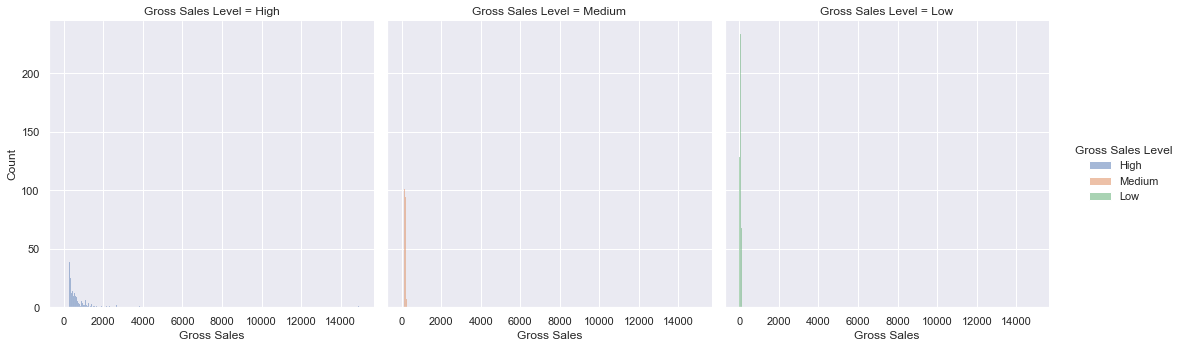

In [430]:
df_clean['Gross Sales Level']=df_clean['Gross Sales'].apply(label, low_max=116, high_min=240)
df_clean.sample(10)
sns.displot(df_clean, x='Gross Sales', kind = 'hist', col='Gross Sales Level', hue = 'Gross Sales Level');

In [ ]:
El nivel de ventas brutas es principalmente bajo.

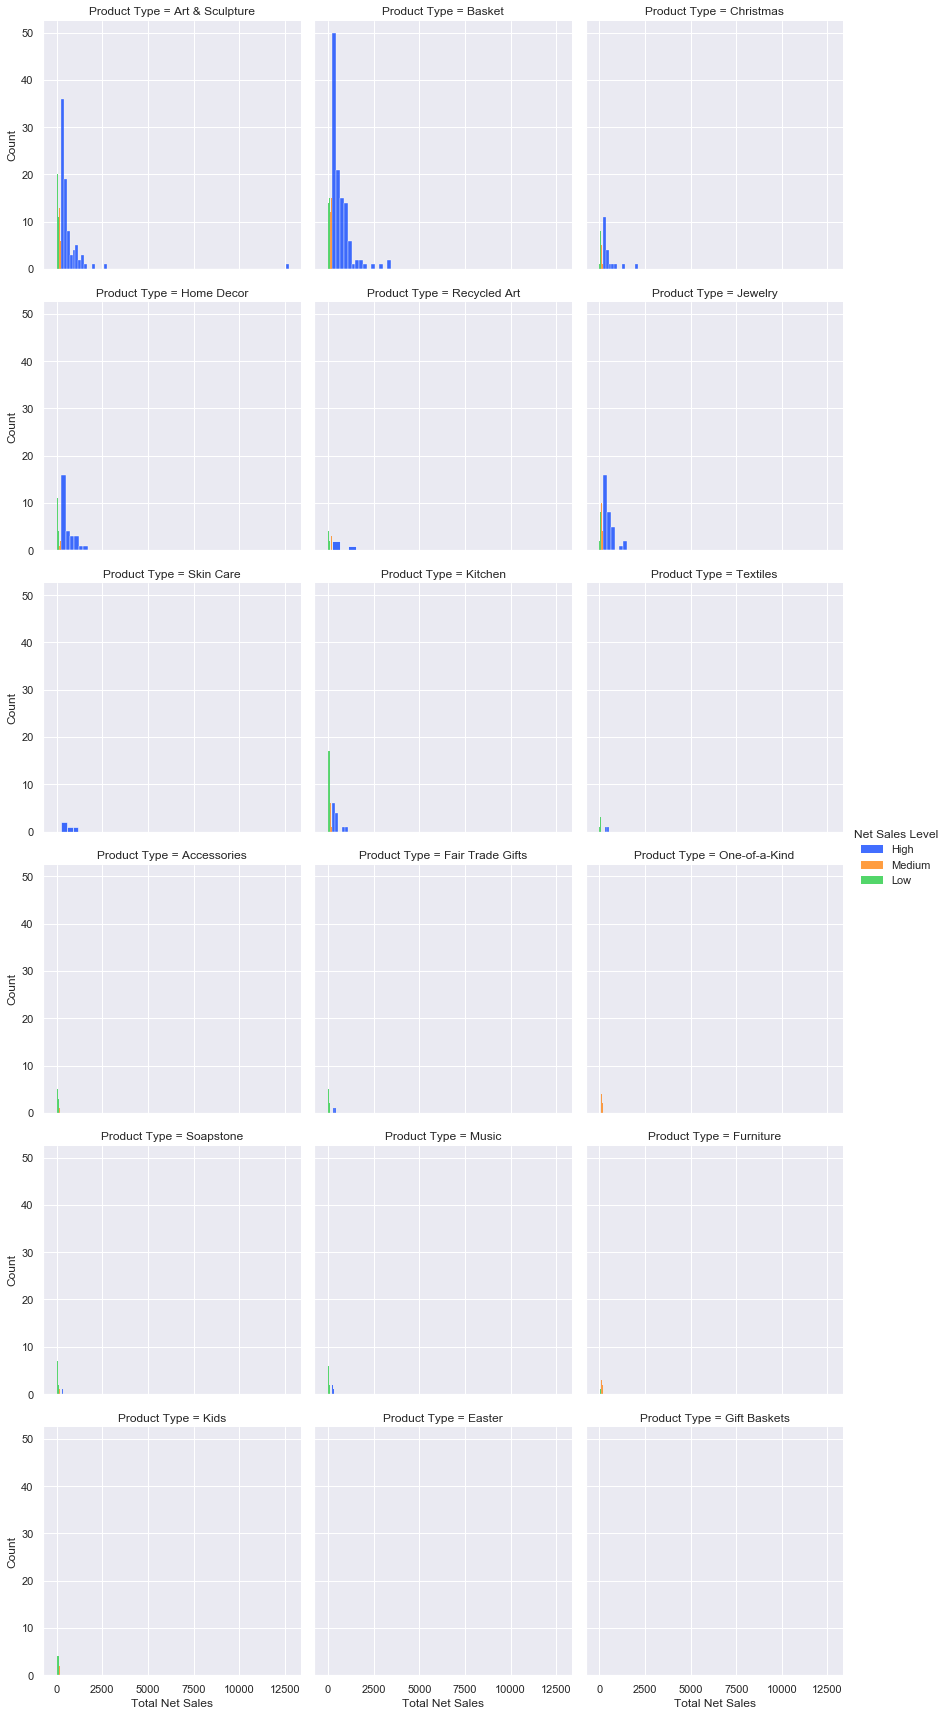

In [425]:
df_clean['Net Sales Level']=df_clean['Total Net Sales'].apply(label,low_max=110,high_min=225)
g=sns.FacetGrid(df_clean, col='Product Type',hue='Net Sales Level', col_wrap =3, height=4, palette='bright')
g.map(sns.histplot,'Total Net Sales')
g.add_legend();

Las categorías Art&Sculpture, Basket, Christmas, Jewelry, Home Decor son las que presentan las ventas netas totales más altas. 

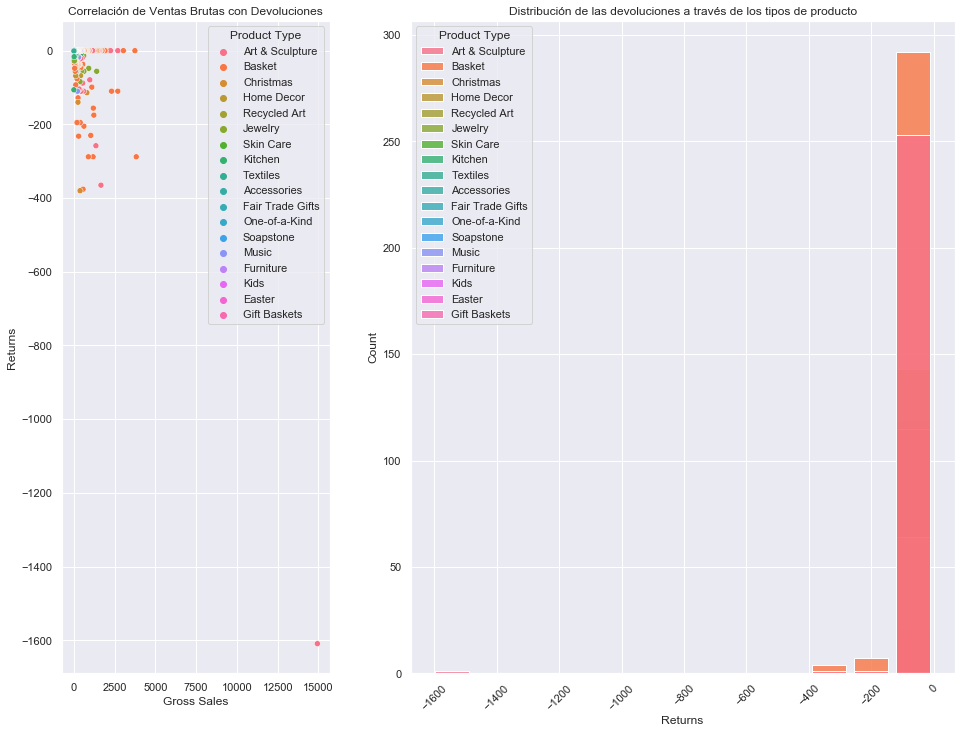

In [344]:
fx, axs = plt.subplots(1, 2, figsize = (16,12), gridspec_kw = dict(width_ratios=[.33,.67]))
sns.scatterplot(data = df_clean, x = 'Gross Sales', y = 'Returns', hue = 'Product Type',ax = axs[0])
sns.histplot(data = df_clean, x = 'Returns', hue='Product Type', shrink = .8, alpha = .8, legend = True, ax = axs[1])
f.tight_layout()
axs[0].set_title('Correlación de Ventas Brutas con Devoluciones')
axs[1].set_title('Distribución de las devoluciones a través de los tipos de producto')
plt.xticks(rotation = 45);

No hay ninguna correlacion aparente a través de las categorías de producto entre las devoluciones y las ventas brutas. La distribución del monto de las devoluciones por tipo producto revela que Art&Sculpture y Basket son sustancialmente más elevadas que para el resto de las categorías

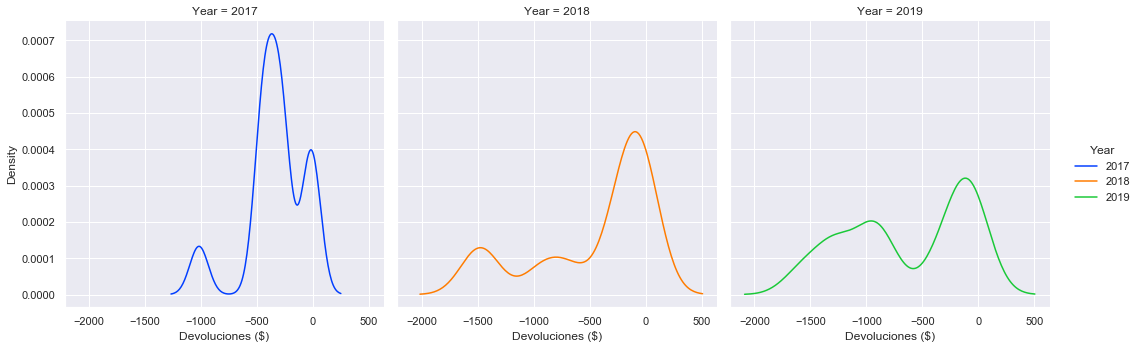

In [346]:
sns.set_theme(style = 'darkgrid')
sns.displot(data = df2_clean, x = 'Returns', hue = 'Year', col = 'Year', palette ='bright', kind='kde', bw_adjust=.5).set_axis_labels('Devoluciones ($)');


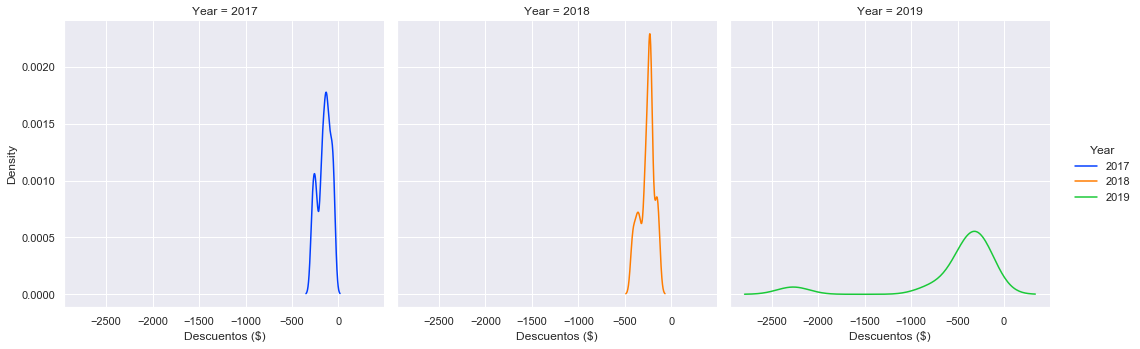

In [94]:
sns.displot(data = df2_clean, x = 'Discounts', hue = 'Year', col = 'Year', kind = 'kde', palette ='bright', bw_adjust=.50).set_axis_labels('Descuentos ($)');


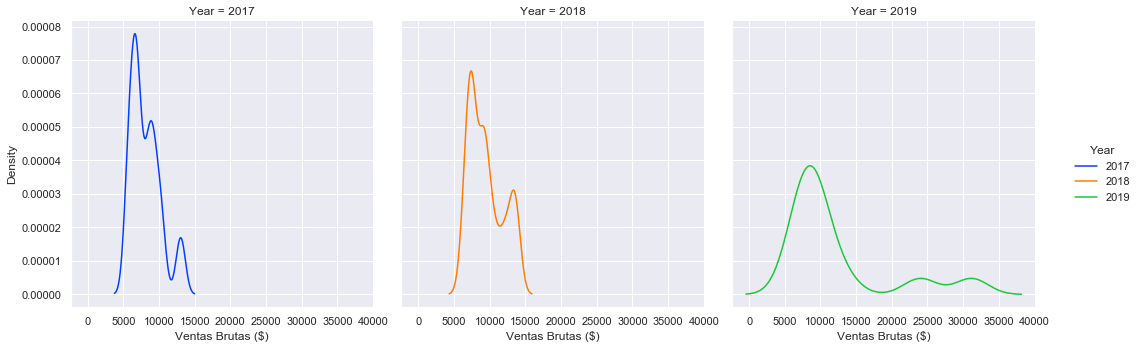

In [95]:
sns.displot(data = df2_clean, x = 'Gross Sales', hue = 'Year', col = 'Year', kind = 'kde', palette ='bright', bw_adjust=.5).set_axis_labels('Ventas Brutas ($)');


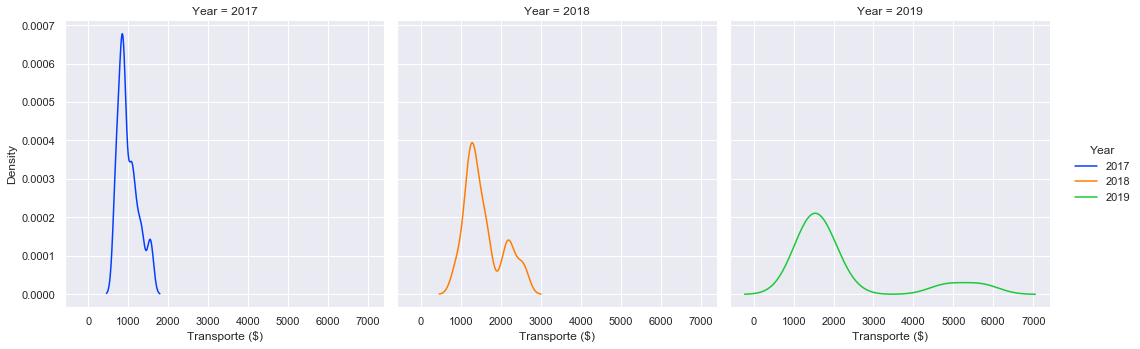

In [96]:
sns.displot(data = df2_clean, x = 'Shipping', hue = 'Year', col = 'Year', kind = 'kde', palette ='bright',bw_adjust=.5).set_axis_labels('Transporte ($)');


La distribución de las devoluciones se va "achatando" a través de los años en términos económicos. Lo mismo se observa para los otros datos: descuentos, ventas brutas y ransporte.

In [410]:
df2_clean['Return Level']=df2_clean['Returns'].apply(label, low_max=10, high_min=50)
display(df2_clean)

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales,Ventas Netas,Ventas Totales,Return Level
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95,8283.65,9371.95,High
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05,6387.60,7280.05,High
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53,4589.10,5296.53,High
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90,8532.60,9600.90,Low
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91,6237.45,7103.91,High
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87,9369.55,10573.87,Medium
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66,5959.30,6766.66,High
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56,7740.10,8583.56,Medium
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62,6732.30,7639.62,High
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42,5327.00,6022.42,High


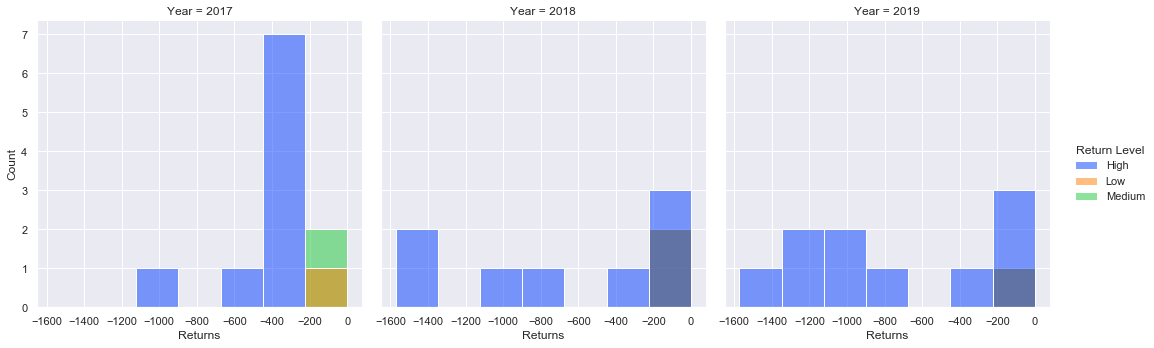

In [411]:
sns.displot(df2_clean, x='Returns', hue='Return Level', col='Year', palette='bright');

En el año 2017 los montos económicos de las devoluciones fueron substancialmente superiores a los años siguientes y se concentraron entre los $200 y $400. Los años 2018 y 2019 muestran devoluciones con mayor valor. En 2019 se registran valores entre $800 y $1600, que son valores particularmente altos comparados con lo registraddo en 2017.

A lo largo de los tres años el número de devoluciones aumentó considerablamente, lo cual es consistente con una mayor penetración del comercio electrónico en el período. Los descuentos aumentaron levemente a lo largo de los tres años, tendencia que aunque sin alcanzar niveles altos es consistente con una mayor competencia en el mercado por lograr la preferencia del consumidor, lo cual es también consistente con la mayor adopción de las compras online.

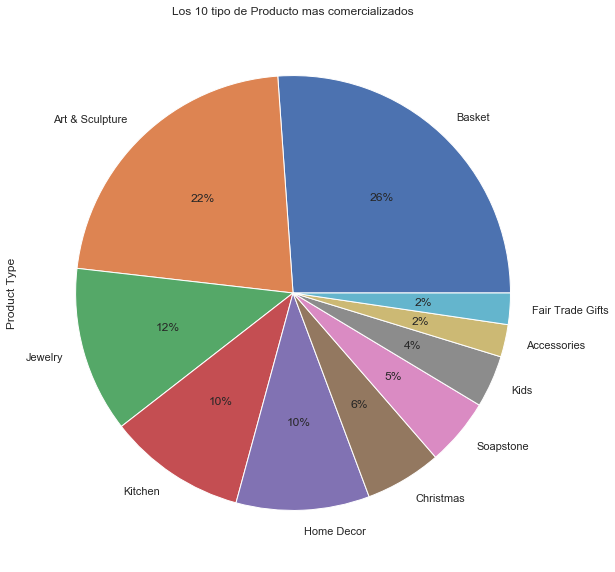

In [356]:
(df_clean['Product Type'].value_counts()[:10]).plot(kind = 'pie', figsize = (10,10), autopct = "%.0f%%", title = 'Los 10 tipo de Producto mas comercializados');

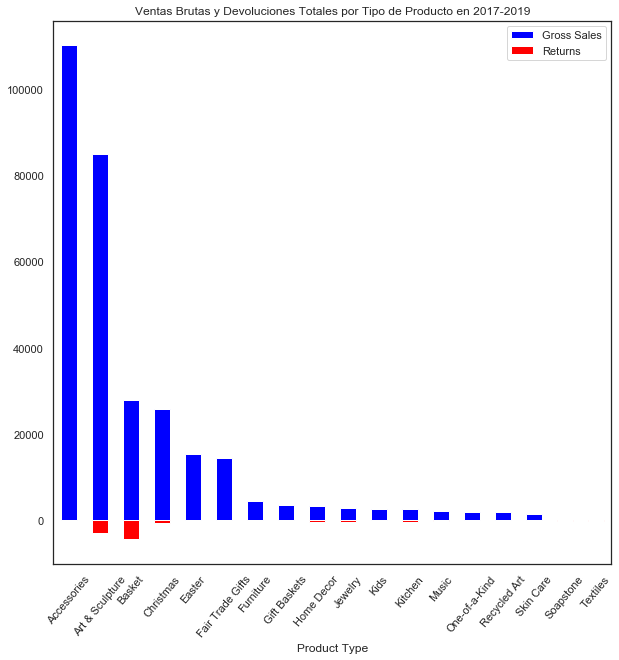

In [315]:
df_clean.groupby('Product Type')['Gross Sales'].sum().sort_values(ascending = False).plot(kind= 'bar', figsize = (10,10), legend = True, color = 'blue')
df_clean.groupby('Product Type')['Returns'].sum().plot(kind= 'bar', figsize = (10,10), legend = True, color = 'red')
plt.xticks(rotation = 50)
plt.title("Ventas Brutas y Devoluciones Totales por Tipo de Producto en 2017-2019");


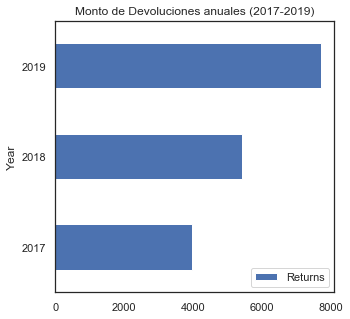

In [327]:
devoluciones_anual = (-df2_clean.groupby(['Year'])['Returns'].sum()).plot(kind = 'barh', legend = True, figsize = (5,5),title = 'Monto de Devoluciones anuales (2017-2019)');

El volumen de cada venta es bajo. La mayoría (75%) se sitúa por debajo de las 5 unidades netas y el monto promedio por venta neta es de alrededor de $228, mientras que un 75% de los descuentos realizados son por montos inferiores a $8.41 y en promedio de $ 7.51, marginales comparados con los montos de las ventas. Por su parte casi la totalidad de las devoluciones (99%) tiene un valor inferior a $181. El máximo monto de devolución registrado alcaza a $1,609, muy superior al valor siguiente de $380.

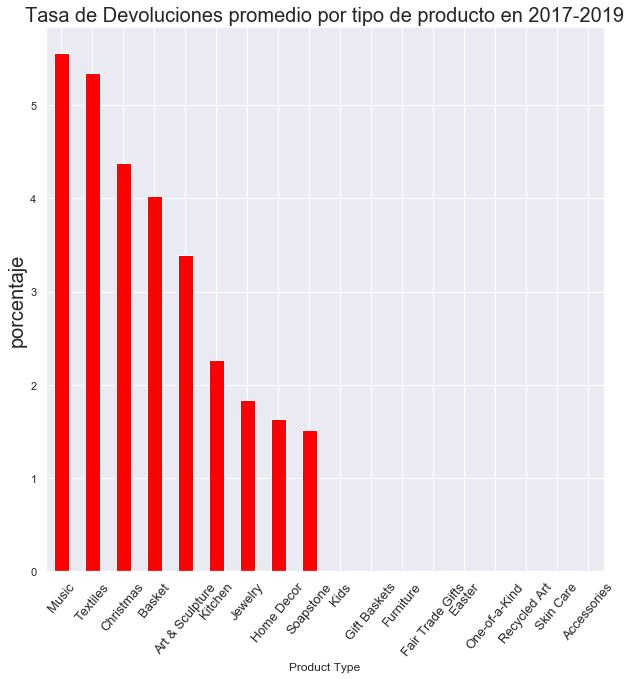

In [431]:
porcent_dev = (-df_clean.groupby('Product Type')['Returns'].sum()/df_clean.groupby('Product Type')['Gross Sales'].sum()*100).sort_values(ascending = False)
porcent_dev.plot(kind = 'bar', figsize = (10,10), color = 'red')
plt.title('Tasa de Devoluciones promedio por tipo de producto en 2017-2019', size = 20)
plt.xticks(rotation = 50, size = 13)
plt.ylabel('porcentaje', size = 20);

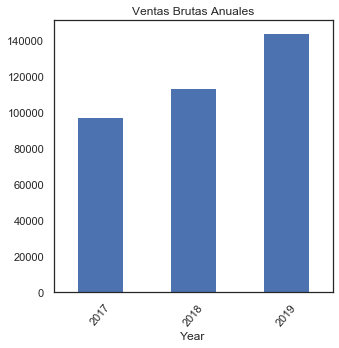

In [329]:
df2_clean.groupby('Year')['Gross Sales'].sum().plot(kind = 'bar',figsize = (5,5))
plt.xticks(rotation = 50)
plt.title('Ventas Brutas Anuales');

In [334]:
"""Revisando a que corresponden las columnas Net Sales y Total Sales"""
df2_clean['Ventas Netas'] = df2_clean['Gross Sales']+df2_clean['Discounts']+df2_clean['Returns']
df2_clean['Ventas Totales']= df2_clean['Net Sales']+df2_clean['Shipping']

In [335]:
df2_clean.sample(10)

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales,Ventas Netas,Ventas Totales
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42,5327.00,6022.42
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56,7740.10,8583.56
20,September,2018,79,10582.85,-276.15,0.00,10306.70,1634.33,11941.03,10306.70,11941.03
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62,6732.30,7639.62
29,June,2019,85,7321.75,-186.02,-165.40,6970.33,1356.80,8327.13,6970.33,8327.13
25,February,2019,63,6523.70,-288.70,-38.70,6196.30,1121.85,7318.15,6196.30,7318.15
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66,5959.30,6766.66
14,March,2018,64,7442.70,-226.82,-8.80,7207.08,1226.92,8434.00,7207.08,8434.00
33,October,2019,97,9132.25,-279.42,-1572.55,7280.28,1631.25,8911.53,7280.28,8911.53
28,May,2019,96,10082.25,-460.90,-173.35,9448.00,1768.20,11216.20,9448.00,11216.20


In [339]:
porcent_dev = porcent_dev.to_frame(name = 'Porcentaje')
porcent_dev.sort_index()
porcent_dev.sample(10)
porcent_dev.sample(10)


,Porcentaje
Product Type,
Kids,-0.000000
Fair Trade Gifts,-0.000000
Kitchen,2.269595
Textiles,5.350248
Christmas,4.380230
Easter,-0.000000
One-of-a-Kind,-0.000000
Art & Sculpture,3.391161
Gift Baskets,-0.000000
